<a href="https://colab.research.google.com/github/manoj-dotcom/Machine-Learning/blob/main/ML_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MANOJ TILAKCHAND - 20X41A4442


Removing duplicates,estimating bias of an estimator,variance of an estimator, performing cross validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris_data=load_iris()
df=pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names)
#add a duplicate example
df.loc[150,]=[5.9,3.0,5.1,1.8]
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8
150                5.9               3.0                5.1               1.8

[151 rows x 4 columns]


In [ ]:
#a) remove duplicates from training set
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#b) bias of an estimator
df=pd.read_csv('/content/drive/MyDrive/housing_prices.csv')
df

,Bed_rooms,Price(lakhs)
0,1,10.0
1,1,10.1
2,1,9.8
3,2,20.5
4,2,19.5
5,2,20.0
6,3,30.0
7,3,26.9
8,3,32.2
9,4,40.9


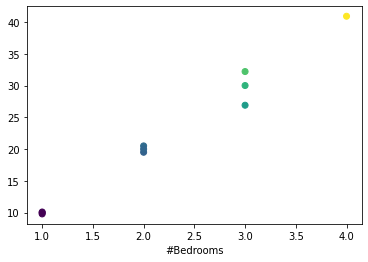

In [ ]:
import matplotlib.pyplot as plt
ax=plt.axes()
ax.scatter(df.iloc[:,0],df.iloc[:,-1],c=df.iloc[:,-1])
ax.set_xlabel('#Bedrooms')
ax.set_label('Price(Lakhs)')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
X=np.array(df.iloc[:,0])[:,None]
y=np.array(df.iloc[:,-1])

In [ ]:
lm=LinearRegression()
lm.fit(X,y)
y_hat=lm.predict(X)

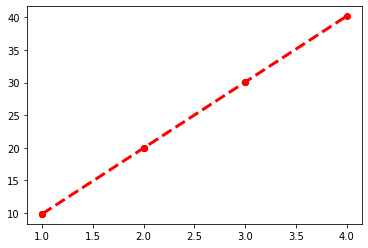

In [ ]:
plt.plot(X,y_hat,'ro--',linewidth=3.0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pm=PolynomialFeatures()
X_h=pm.fit_transform(X)

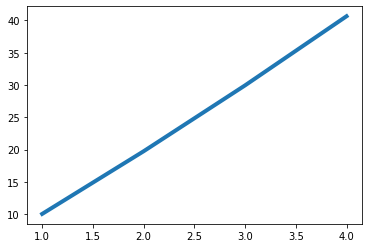

In [ ]:
lm2=LinearRegression()
lm2.fit(X_h,y)
plt.plot(X,lm2.predict(X_h),linewidth=4)

In [ ]:
#c) variance of an estimator
print('From the 1st model,Beta0=',lm.coef_,'Beta1=',lm.intercept_)
Xd=np.delete(X,[3])[:,None]
yd=np.delete(y,[3])#delete a few examples
lm3=LinearRegression()
lm3.fit(Xd,yd)
y_hat=lm3.predict(X)


From the 1st model,Beta0= [10.10625] Beta1= -0.24375000000000568


From the 2nd model,Beta0= [10.11860465] Beta1= -0.3302325581395422


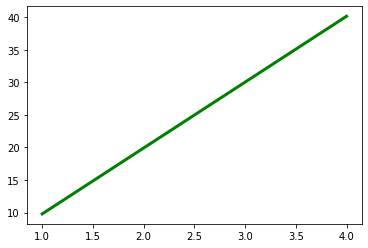

In [ ]:
print('From the 2nd model,Beta0=',lm3.coef_,'Beta1=',lm3.intercept_)
plt.plot(X,y_hat,'g',linewidth=3.0)
plt.show()

In [ ]:
#d)  perform cross validation
from sklearn.model_selection import KFold,cross_val_score
k_folds=KFold(n_splits=5)
scores=cross_val_score(lm,X,y,cv=k_folds)
print("cross validation scores:",scores)
print("Average cv score:",scores.mean())
print("Numebr of cv scores used in average:",len(scores))

cross validation scores: [-56.25         0.99380627  -1.22160665  -2.47300989   0.4927882 ]
Average cv score: -11.69160441403861
Numebr of cv scores used in average: 5
